### Lab 1. 1D search methods

1. Implement methods: Dichotomy, golden-section search, Fibonacci, Successive parabolic search, Brent's method.
2. Check on unimodal functions of different nature (discussed in lectures)
3. Test on many-modal functions.
4. Create plots: the number of iterations/calculations of the function versus accuracy, the dynamics of the uncertainty interval for the given function.
5. Bonus: measuring code execution time. It is recommended to run several times for averaging.

### 1.
Implement methods:
1. Dichotomy search
2. Golden-section search
3. Fibonacci search
4. Successive parabolic interpolation
5. Brent's method

---

In [288]:
import numpy as np
from typing import Callable

In [289]:
def dichotomy_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a

    w = eps / 3
    # w < eps/2
    while b - a > eps:
        c = (a + b) * 0.5
        x = c - w
        y = c + w
        if f(x) < f(y):
            b = y
        else:
            a = x

    return (b + a) / 2

In [290]:
def golden_section_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    # a < x < y < b
    # (b-a)/(b-x) = (b-x)/(x-a)
    # (b-a)(x-a) = (b-x)(b-x)
    # (b-a)(-(b-x)+b-a) = (b-x)(b-x)
    # (b-a)(-z+b-a) = z^2
    # 0 = z^2 + z(b-a) - (b-a)^2
    # z = (a-b)/2 +- sqrt(5)/2(b-a)
    # z = b - x = (-1 +- sqrt(5))/2 (b-a)
    # x = b + (1 -+ sqrt(5))/2 (b-a)
    #   = b - (sqrt(5) - 1)/2 (b-a)
    # y = a + (sqrt(5) - 1)/2 (b-a)

    # golden ratio
    gr = (5**0.5 - 1) / 2
    while b - a > eps:
        x = b - (b - a) * gr
        y = a + (b - a) * gr
        if f(x) < f(y):
            b = y
        else:
            a = x

    return (b + a) / 2

In [291]:
def fibonacci_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    # a < x < y < b
    # x - a = b - y

    # Ln = an - bn = w < eps
    # xn = an + w / 2
    # yn = bn - w / 2 = xn

    # Ln-1 = 2 Ln - w / 2
    # Ln-2 = Ln-1 + Ln

    # Ln   =  1  * w = 2 * w / 2   | ...
    # Ln-1 = 1.5 * w = 3 * w / 2   | ....
    # Ln-2 = 2.5 * w = 5 * w / 2   | .. ..
    # Ln-3 =         = 8 * w / 2   | .  ..  .
    # Ln-3 =         = 13 * w / 2  | .   .  .   .

    # |=> Lk = Fn+3-k * w / 2
    #    Fn+2 = Fn+1 + Fn
    #    F0 = 0
    #    F1 = 1

    # xn-1 = an-1 + 1 * w / 2
    # yn-1 = an-1 + 2 * w / 2
    # xn-2 = an-2 + 2 * w / 2
    # yn-2 = an-2 + 3 * w / 2
    # =>
    # xk = ak + Lk+2
    # yk = ak + Lk+1

    # eps ~ Fn ?
    # L0 = Fn+3 * w / 2
    # 2 * L0 / Fn+3 = w < eps
    # =>
    # Fn+3 > 2 * (b - a) / eps

    def F(k: int) -> int:
        """-> nth fibonacci number"""
        assert type(n) is int
        if k < 0:
            return None
        if not hasattr(fibonacci_search, "fib_dict"):
            # init hash
            fibonacci_search.fib_dict = dict()
            fibonacci_search.fib_dict[0] = 0
            fibonacci_search.fib_dict[1] = 1

        if k not in fibonacci_search.fib_dict:
            fibonacci_search.fib_dict[k] = F(k - 2) + F(k - 1)

        return fibonacci_search.fib_dict[k]

    # find n
    n = 0
    while 2 * (b - a) >= eps * F(n + 3):
        n += 1

    def L(k: int) -> float:
        # 2 * L0 / Fn+3 = w
        # Lk = Fn+3-k * w / 2
        # =>
        # Lk = Fn+3-k * L0 / Fn+3
        assert n + 3 - k >= 0
        assert n + 3 >= 0
        return F(n + 3 - k) / F(n + 3) * (b - a)

    assert L(n + 2) == L(n + 1)
    ak = a
    x = ak + L(2)
    y = ak + L(1)
    fx = f(x)
    fy = f(y)
    for k in range(1, n + 1):
        if fx < fy:
            # a     x y b
            # a (x) y b
            y = x
            fy = fx
            x = ak + L(k + 2)
            fx = f(x)
        else:
            # a x y     b
            #   a x (y) b
            ak = x
            x = y
            fx = fy
            y = ak + L(k + 1)
            fy = f(y)
    return x

In [292]:
def spi(
    f: Callable[[float], float],
    x1: float,
    x2: float,
    x3: float,
    f1: float,
    f2: float,
    f3: float,
    eps=1e-9,
):
    # f(x) ~= p(x) = a x^2 + b x + c
    # f1 = a x1^2 + b x1 + c
    # f2 = a x2^2 + b x2 + c
    # f3 = a x3^2 + b x3 + c

    # f1 - f2 = a (x1^2 - x2^2) + b (x1 - x2)
    # f2 - f3 = a (x2^2 - x3^2) + b (x2 - x3)
    # [F1]   [ X1 X2 ] [a]
    # [F2] = [ X3 X4 ] [b]
    # =>
    # [a]   [ X4  -X2 ] [F1]
    # [b] = [ -X3  X1 ] [F2] / (X1 X4 - X2 X3)

    # u = - b / (2 a)
    #   = - (-X3 F1 + X1 F2)/(2 * (X4 F1 - X2 F2))
    #   = (X3 F1 - X1 F2)/(2 * (X4 F1 - X2 F2))
    while x3 - x1 > eps:
        X1 = x1**2 - x2**2
        X2 = x1 - x2
        X3 = x2**2 - x3**2
        X4 = x2 - x3
        F1 = f1 - f2
        F2 = f2 - f3
        if (X4 * F1 - X2 * F2) == 0.0:
            return x2
        u = (X3 * F1 - X1 * F2) / (2 * (X4 * F1 - X2 * F2))
        fu = f(u)
        if not (x1 < u < x3):
            return x2
        # sort
        if u < x2:
            x2, u = u, x2
            f2, fu = fu, f2
        if f2 < fu:
            # x1 x2     u  x3
            # x1 x2 (u) x3
            x3 = u
            f3 = fu
        else:
            # x1 x2 u      x3
            #    x1 x2 (u) x3
            x1 = x2
            x2 = u
            f1 = f2
            f2 = fu

    return (x1 + x3) / 2


def successive_parabolic_interpolation(
    f: Callable[[float], float], a: float, b: float, eps=1e-9
):
    if b < a:
        a, b = b, a
    # a < (x < y) < b
    # ->
    # x1 < x2 < x3
    x1 = a
    x2 = (b + a) / 2
    x3 = b
    f1 = f(x1)
    f2 = f(x2)
    f3 = f(x3)
    return spi(f, x1, x2, x3, f1, f2, f3)

In [293]:
def brent_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    # a < x w v u < b
    # fx < fw < fv <(fa,fu,fb)
    # g = b - a
    # if x!=w!=v & fx!=fw!=fv:
    #   u <- spi(x,w,v)
    #   if u in [a+eps,b-eps] | u in [x-g/2,x+g/2]:
    #
    K = (3 - 5**0.5) / 2
    x = w = v = (a + b) / 2
    fx = fw = fv = f(x)
    this_step = prev_step = b - a
    while b - a > eps:
        g = e
        e = this_step
        if len(set(x, w, v)) == 3 and len(set(fx, fw, fv)) == 3:
            u = spi(x, w, v, fx, fw, fv)
            if a + eps <= u <= b - eps and x - g / 2 <= u <= x + g / 2:
                d = abs(u, x)
            else:
                if x < (b - a) / 2:
                    u = x + K * (b - x)
                    d = b - x
                else:
                    u = x - K * (x - a)
                    d = x - a
                if x - eps <= u <= x + eps:
                    u = x + np.sign(u - x) * eps
                fu = f(u)
                if fu <= f(x):
                    if u >= x:
                        a = x
                    else:
                        b = x
                    v = w
                    w = x
                    x = u
                    fv = fw
                    fw = fx
                    fx = fu
                else:
                    if u >= x:
                        b = u
                    else:
                        a = u
                    if fu <= fw or w == x:
                        v = w
                        w = u
                        fv = fw
                        fw = fu
                    elif fu <= fv or v == x or v == w:
                        v = u
                        fv = fu
    return b

In [294]:
def brent2(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    maxiter = 100
    mintol = 1e-200
    K = (3 - 5**0.5) / 2
    x = w = v = (a + b) / 2
    fw = fv = fx = f(x)
    deltax = 0.0
    iter = 0
    while iter < maxiter:
        tol1 = eps * np.abs(x) + mintol
        tol2 = 2.0 * tol1
        xmid = 0.5 * (a + b)
        # check for convergence
        if np.abs(x - xmid) < (tol2 - 0.5 * (b - a)):
            break
        # XXX In the first iteration, rat is only bound in the true case
        # of this conditional. This used to cause an UnboundLocalError
        # (gh-4140). It should be set before the if (but to what?).
        if np.abs(deltax) <= tol1:
            if x >= xmid:
                deltax = a - x  # do a golden section step
            else:
                deltax = b - x
            rat = K * deltax
        else:  # do a parabolic step
            tmp1 = (x - w) * (fx - fv)
            tmp2 = (x - v) * (fx - fw)
            p = (x - v) * tmp2 - (x - w) * tmp1
            tmp2 = 2.0 * (tmp2 - tmp1)
            if tmp2 > 0.0:
                p = -p
            tmp2 = np.abs(tmp2)
            dx_temp = deltax
            deltax = rat
            # check parabolic fit
            if (
                (p > tmp2 * (a - x))
                and (p < tmp2 * (b - x))
                and (np.abs(p) < np.abs(0.5 * tmp2 * dx_temp))
            ):
                rat = p * 1.0 / tmp2  # if parabolic step is useful.
                u = x + rat
                if (u - a) < tol2 or (b - u) < tol2:
                    if xmid - x >= 0:
                        rat = tol1
                    else:
                        rat = -tol1
            else:
                if x >= xmid:
                    deltax = a - x  # if it's not do a golden section step
                else:
                    deltax = b - x
                rat = K * deltax
        if np.abs(rat) < tol1:  # update by at least tol1
            if rat >= 0:
                u = x + tol1
            else:
                u = x - tol1
        else:
            u = x + rat
        fu = f(u)  # calculate new output value
        # funcalls += 1
        if fu > fx:  # if it's bigger than current
            if u < x:
                a = u
            else:
                b = u
            if (fu <= fw) or (w == x):
                v = w
                w = u
                fv = fw
                fw = fu
            elif (fu <= fv) or (v == x) or (v == w):
                v = u
                fv = fu
        else:
            if u >= x:
                a = x
            else:
                b = x
            v = w
            w = x
            x = u
            fv = fw
            fw = fx
            fx = fu
        iter += 1
    return x

### 2.
Check on unimodal functions of different nature (discussed in lectures)

---

#### Create test functions

In [295]:
import numpy as np
import matplotlib.pyplot as plt

In [302]:
def f1(x):
    return x**2


def f2(x):
    return np.abs(x)


def f3(x):
    return np.sqrt(np.abs(x))


def f4(x):
    return np.log(np.abs(x))


def f5(x):
    return 1 / (1 + np.exp(-np.abs(x))) - 0.3


def f6(x):
    w = x+1
    return 1 / w + w 


def f7(x):
    w = x+2.5
    return 1 / w - 1 / (w - 5)


def f8(x):
    w = x+2.5
    return (1 / w - 1 / (w - 5)) ** 2


def f9(x):
    w = x+2.5
    return np.where(w < 3, np.where(2 < w < 3, 0, (w - 2) ** 2), (w - 3) ** 2)

/tmp/ipykernel_31372/3942458354.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / w + w
/tmp/ipykernel_31372/3942458354.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / w - 1 / (w - 5)
/tmp/ipykernel_31372/3942458354.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / w - 1 / (w - 5)) ** 2


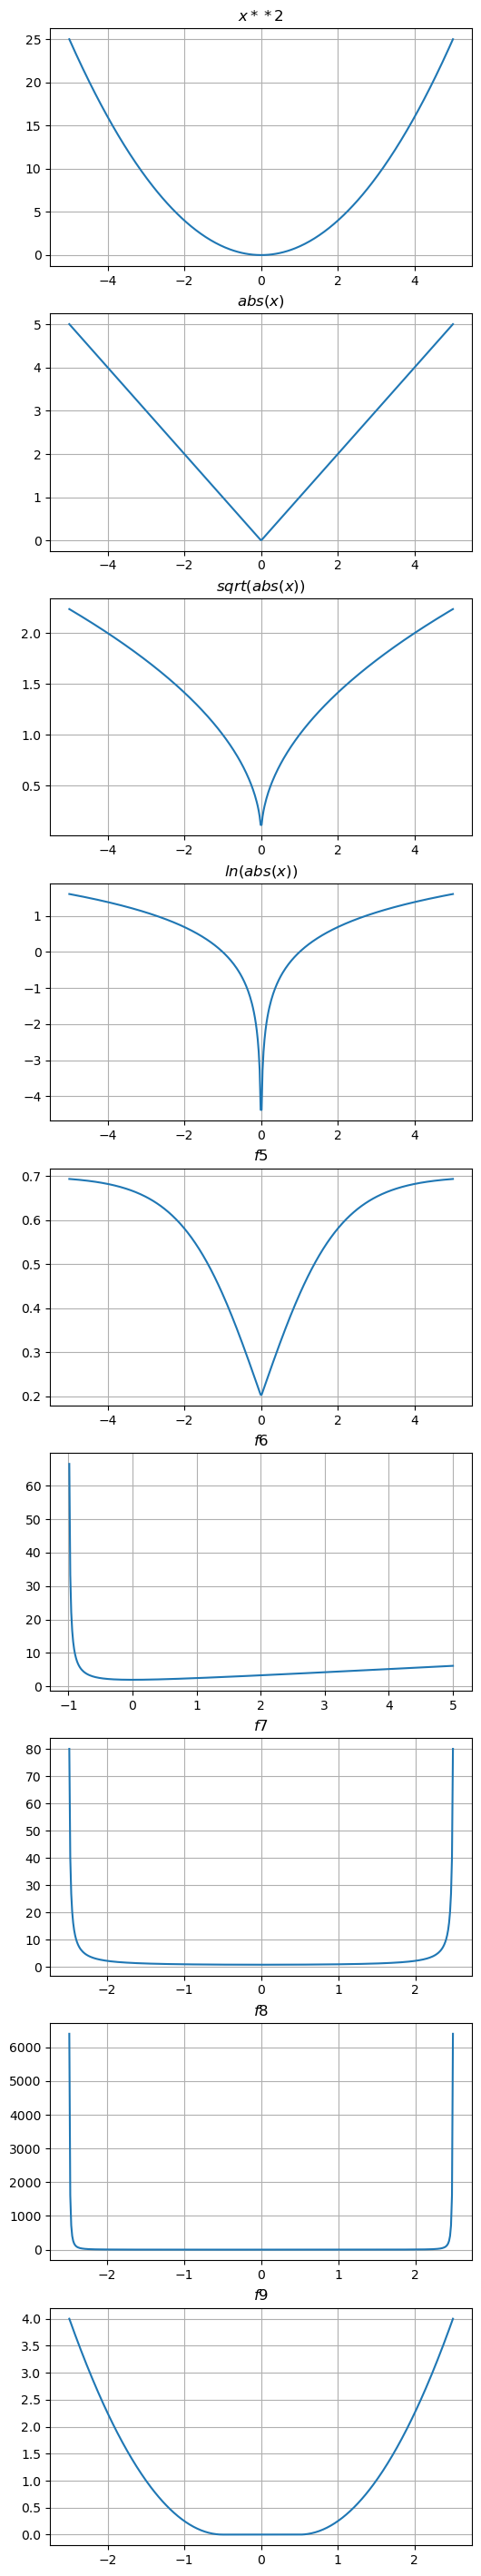

In [307]:
def s2m(s: str):
    return "$" + s + "$"


tests = [
    (f1, -5, 5, "x**2"),
    (f2, -5, 5, "abs(x)"),
    (f3, -5, 5, "sqrt(abs(x))"),
    (f4, -5, 5, "ln(abs(x))"),
    (f5, -5, 5, "f5"),
    (f6, -1, 5, "f6"),
    (f7, -2.5, 2.5, "f7"),
    (f8, -2.5, 2.5, "f8"),
    (f9, -2.5, 2.5, "f9"),
]
n = len(tests)
figsize = (6, 4 * n)
plt.figure(figsize=figsize)
for k in range(n):
    test = tests[k]
    f, a, b, s = test
    plt.subplot(n, 1, k + 1)
    x = np.linspace(a, b, num=400)
    y = [f(i) for i in x]
    plt.plot(x, y)
    plt.title(s2m(s))
    plt.grid(True)
plt.show()

#### Perform tests

/tmp/ipykernel_31372/3942458354.py:14: RuntimeWarning: divide by zero encountered in log
  return np.log(np.abs(x))
/tmp/ipykernel_31372/1076838475.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  u = (X3 * F1 - X1 * F2) / (2 * (X4 * F1 - X2 * F2))
/tmp/ipykernel_31372/2844652310.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
/tmp/ipykernel_31372/2844652310.py:29: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)
/tmp/ipykernel_31372/2844652310.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  p = (x - v) * tmp2 - (x - w) * tmp1


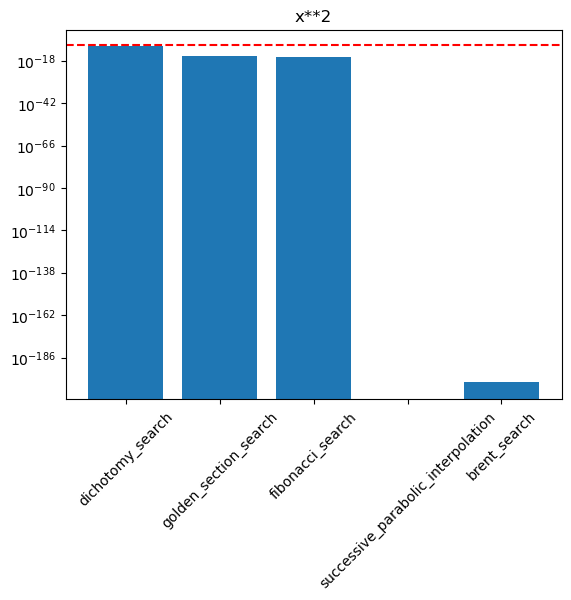

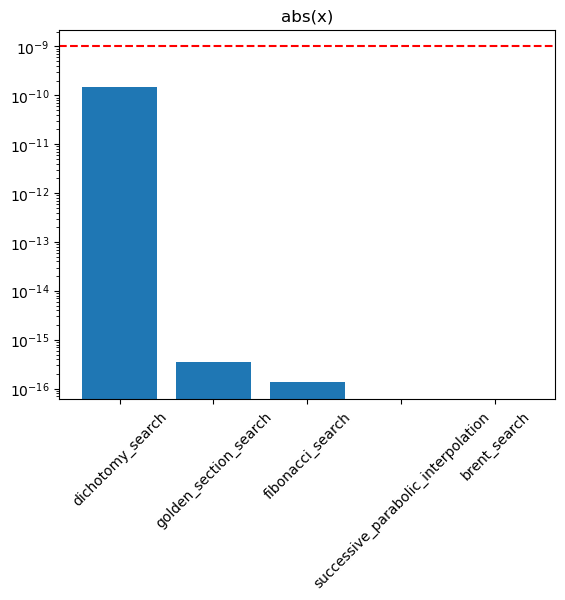

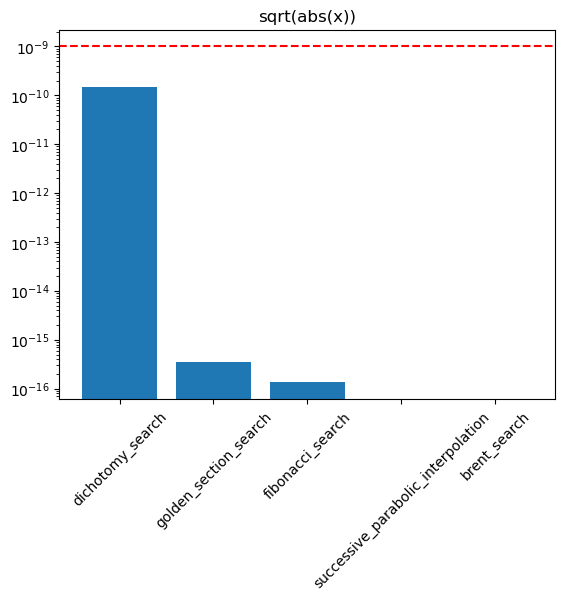

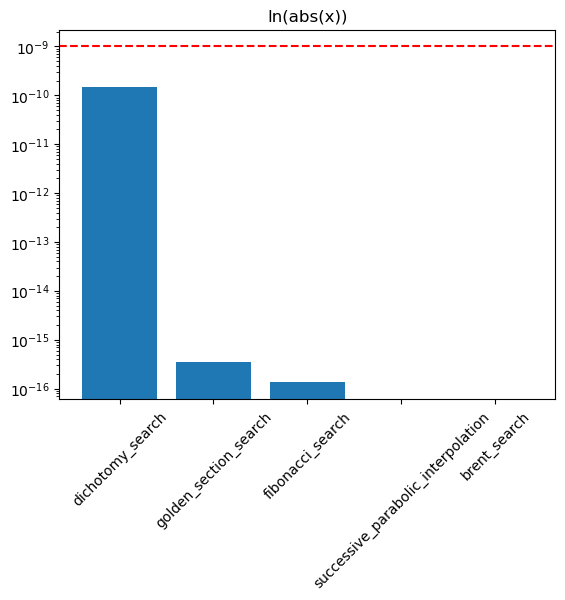

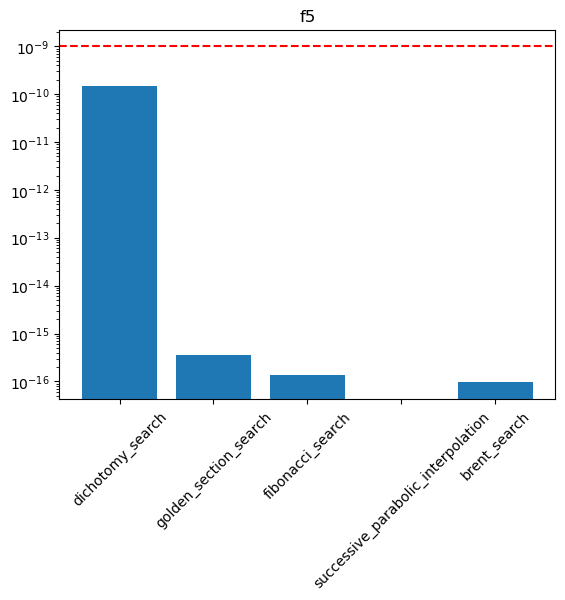

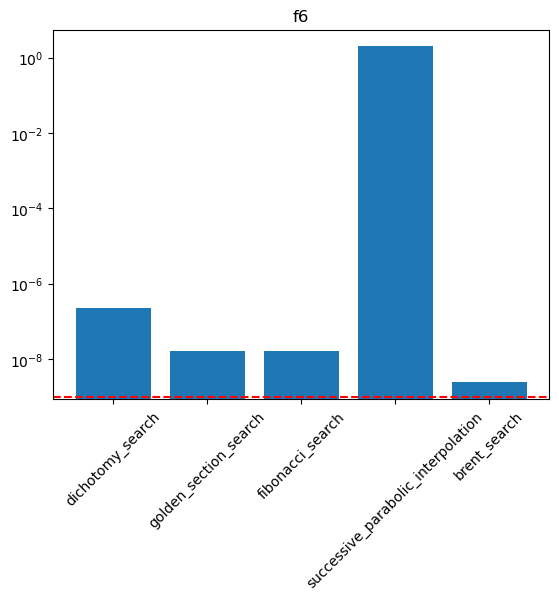

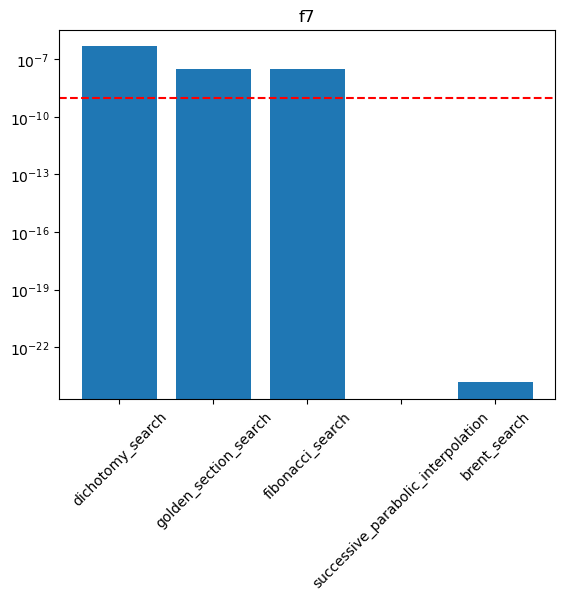

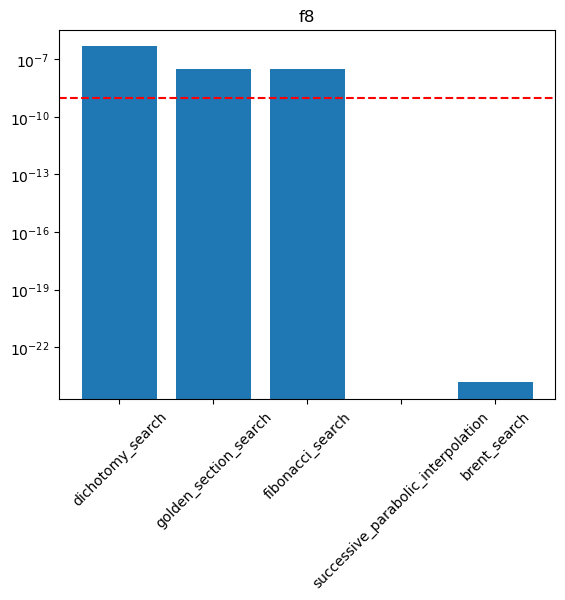

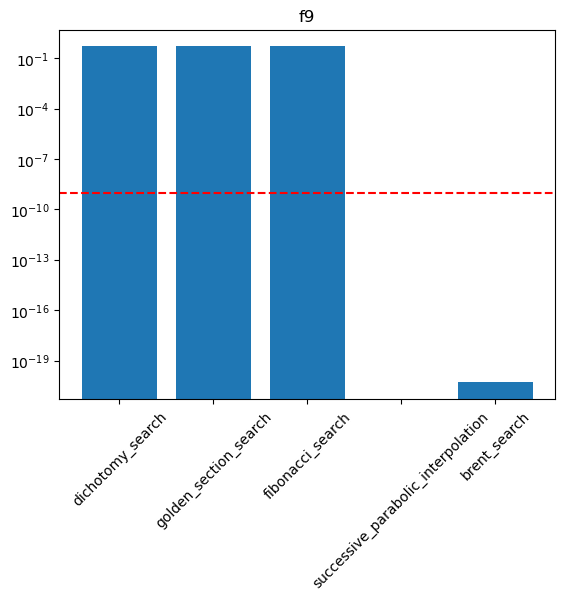

In [308]:
eps = 1e-9
search_methods = (
    (dichotomy_search, "dichotomy_search"),
    (golden_section_search, "golden_section_search"),
    (fibonacci_search, "fibonacci_search"),
    (successive_parabolic_interpolation, "successive_parabolic_interpolation"),
    (brent2, "brent_search"),
)
g = dict()
# abs error for test and method
for test in tests:
    f, a, b, test_name = test
    for method in search_methods:
        optimize, method_name = method
        try:
            minx = optimize(f, a, b)
        except:
            minx = optimize(f, a + eps, b - eps)
        # print(minx)
        error = np.abs(minx - 0)
        g.setdefault(test_name, dict())[method_name] = error


def sorted_keys(d: dict):
    return sorted([k for k in d.keys()])


def sorted_dict(d: dict):
    return [(k, d[k]) for k in sorted_keys(d)]


test_items = g.items()
for test_name, d in test_items:
    # items = sorted_dict(d)
    items = d.items()
    plt.bar(*zip(*items))
    plt.yscale("log")
    plt.xticks(rotation=45)
    plt.axhline(eps,linestyle='--',color='red')
    plt.title(test_name)
    plt.show()

### 3.
Check on many-modal functions

---

### 4. 
Create plots: the number of iterations/calculations of the function versus accuracy, the dynamics of the uncertainty interval for the given function.

---

### 5.
Bonus: measuring code execution time. It is recommended to run several times for averaging.

---